# Heart Disease
A simple analysis and classification of the heart diseases made using a modified version of the [heart disease dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/code).

After a simple preprocessing and description of the data we will implement two classifier for predicting the possibility of having an heart disease.

In [131]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [132]:
df = pd.read_csv("W23 - heart_modified.csv", sep=",")
target = "HeartDisease"
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,65,M,ASY,114,318,ST,140,N,4.4,Down,1
1,62,M,ASY,128,223,ST,119,Y,2.0,Down,1
2,56,M,ASY,140,298,Normal,122,Y,4.2,Flat,1
3,59,M,ASY,180,285,ST,120,Y,1.5,Flat,1
4,71,M,ASY,185,0,Normal,98,Y,0.0,Up,1


In [133]:
df.ChestPainType.unique()
df.RestingECG.unique()

array(['ST', 'Normal', 'LVH'], dtype=object)

## Categorical to numerical conversion

In [134]:
df["Sex"] = df["Sex"].map({"M": 0, "F": 1})
df["ExerciseAngina"] = df["ExerciseAngina"].map({"N": 0, "Y": 1})
df["ChestPainType"] = df["ChestPainType"].map({"ASY": 0, "ATA": 1, "NAP": 2, "TA": 3})
df["ST_Slope"] = df["ST_Slope"].map({"Down": -1, "Flat": 0, "Up": 1})
df["RestingECG"] = df["RestingECG"].map(
    {"ST": 0, "Normal": 1, "LVH": 2})


# Statistical Analysis
For the statistical analysis we will use the describe methods provided by the DataFrame class in pandas.

We can notice that the dataset has more male records than female.

From the correlation matrix the features that affect more the possibility of an heart disease are:
- OldPeak
- ExerciseAngina

Instead, features with negative correlation are the ones that makes a disease unlikely, these are:
- MaxHR
- ST_Slope

In [135]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,59.218954,0.210240,0.781046,132.396514,198.799564,1.010893,136.809368,0.404139,0.887364,0.361656,0.553377
std,11.317997,0.407701,0.956519,18.514154,109.384145,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,-1.000000,0.000000
25%,51.000000,0.000000,0.000000,120.000000,173.250000,1.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,0.000000,130.000000,223.000000,1.000000,138.000000,0.000000,0.600000,0.000000,1.000000
75%,67.000000,0.000000,2.000000,140.000000,267.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,87.000000,1.000000,3.000000,200.000000,603.000000,2.000000,202.000000,1.000000,6.200000,1.000000,1.000000


<AxesSubplot: >

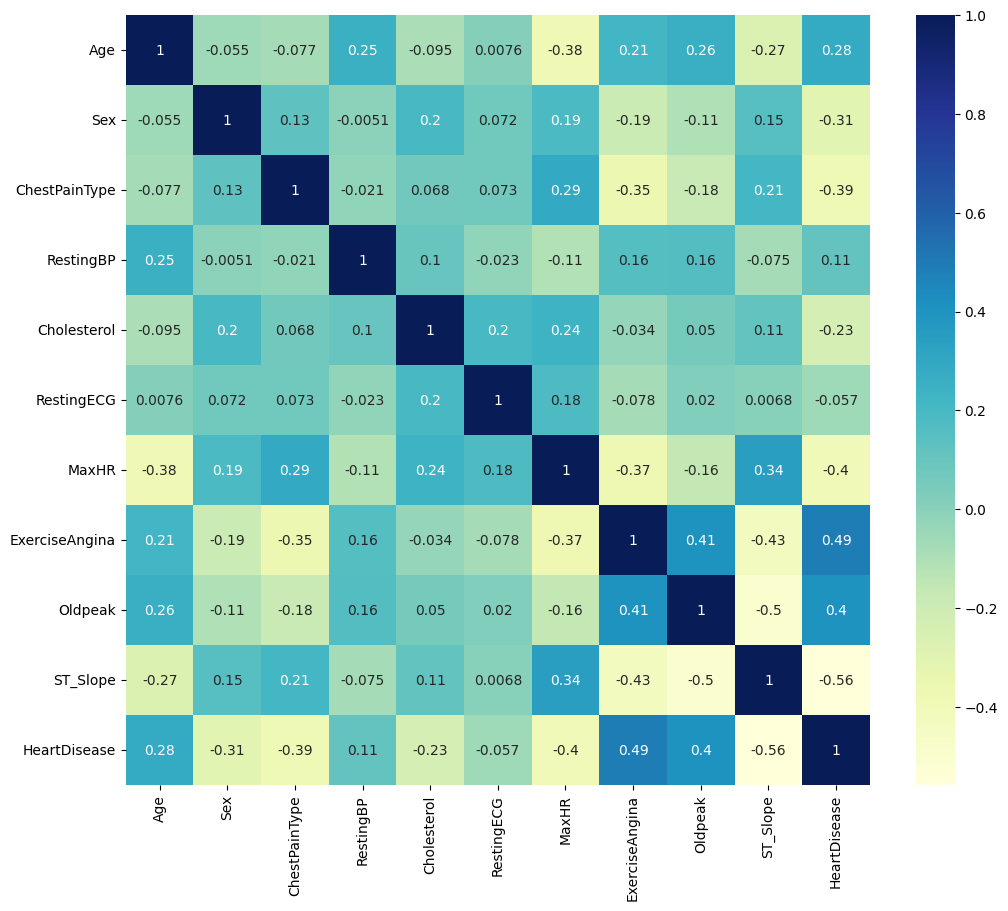

In [136]:
corr = df[df.columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="YlGnBu", annot=True)

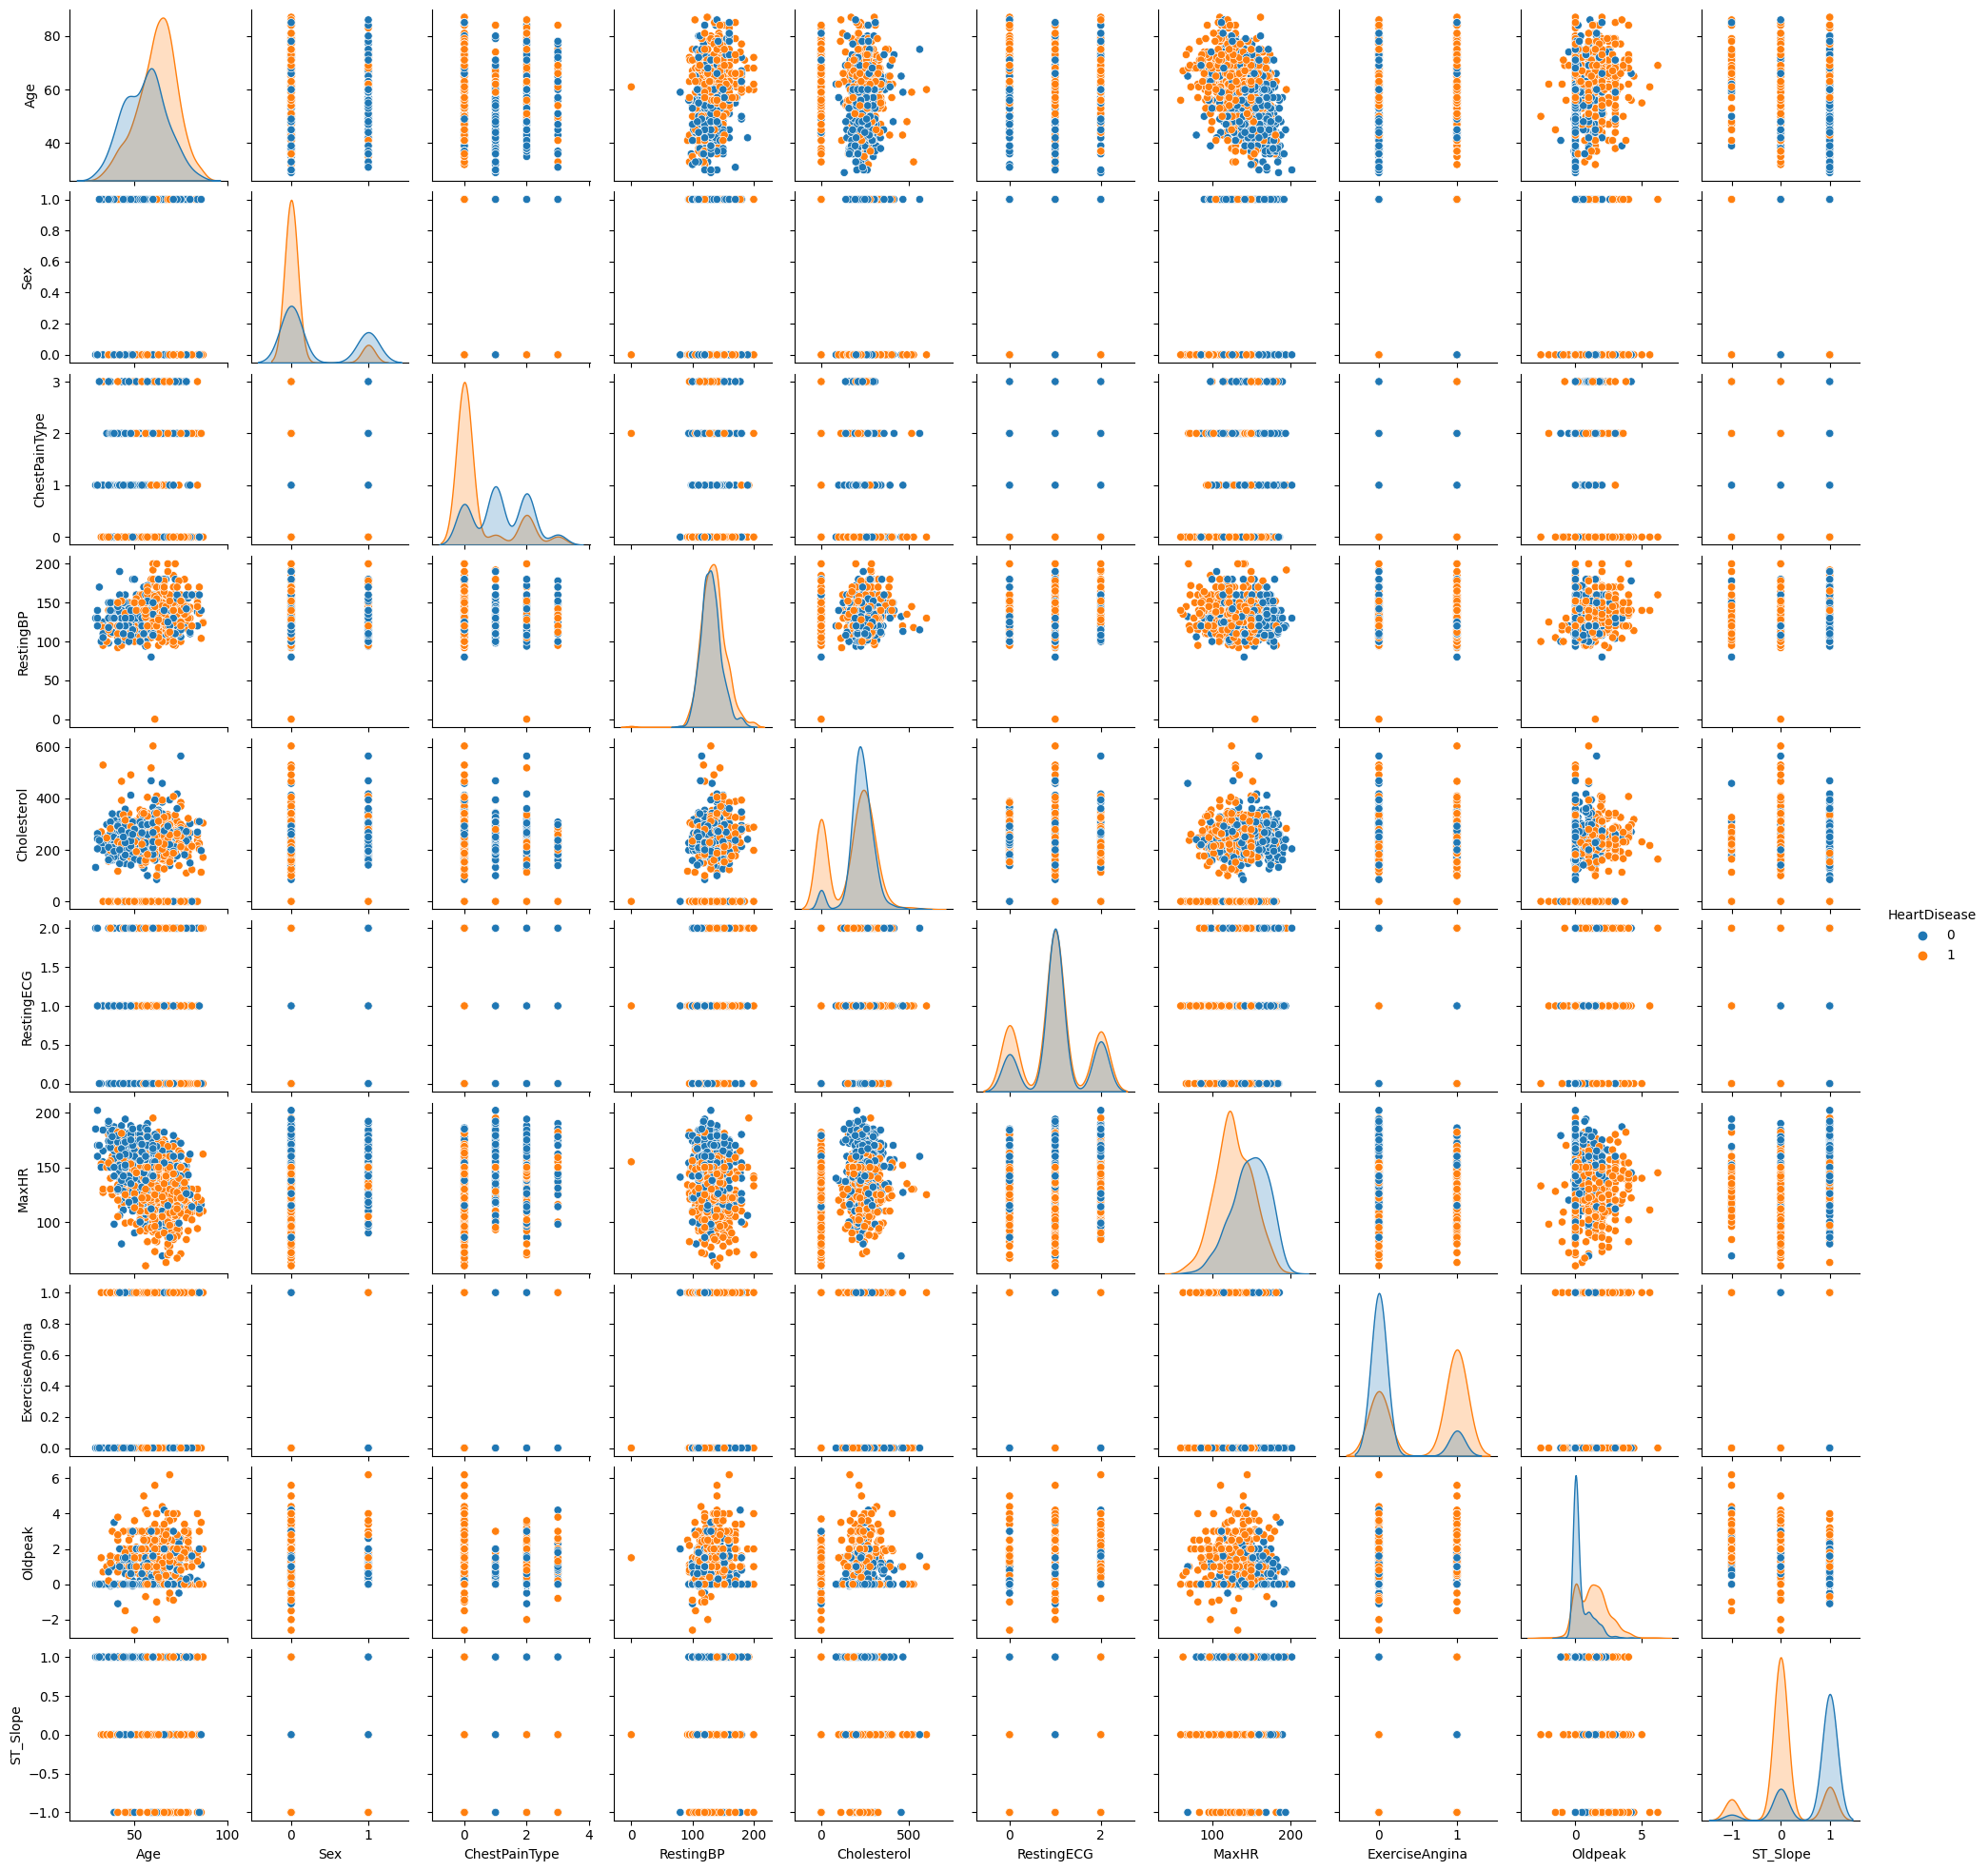

In [137]:
sns.pairplot(df, hue=target, height=2)

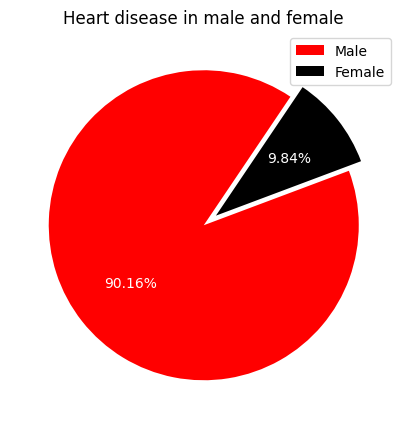

In [138]:
plt.figure(figsize=(5, 7))
plt.title("Heart disease in male and female")
sex = ["Male", "Female"]
# values = df[target].value_counts()[1]
male_value = df.loc[df["Sex"] == 0][target].value_counts()[1]
female_value = df.loc[df["Sex"] == 1][target].value_counts()[1]
color = ["red", "black"]
plt.pie([male_value, female_value], labels=sex, colors=color, explode=(0, 0.1),
        autopct="%.2f%%", textprops={"color": "w"}, startangle=56)
plt.legend()


# Classifier
For the classification task we used two different classifiers:
- A decision tree
- Linear regression

Initially we will use standard classifier with default hyperparameters, later we will choose them using the GridSearch with cross validation.

The metrics computed are:
- Accuracy on test set
- Cross-val score
- Precision
- Recall

In [139]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score


In [140]:
random_state = 94922767

X = df.drop(target, axis=1)
y = df[target]

columns = X.columns

# Data scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=random_state, train_size=0.7)


In [141]:

# Plot the confusion matrix and the metrics report
def report(model, X_test, y_true):
    labels = [0, 1]
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_true, y_pred)
    cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    cmp.plot()
    print(classification_report(y_true, y_pred, labels=labels))


## Linear Regression
A simple linear logistic regression. We can see no significant improvement in the grid search model  

In [142]:
# Linear regression with standard parameters
linear = linear_model.LogisticRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")
scores = cross_val_score(linear, X_train, y_train, cv=5)
print(f"Accuracy on cross validation: {scores.mean()}")


Accuracy on the test set: 0.8333333333333334
Accuracy on cross validation: 0.8503997093023254


In [143]:
# Grid search with cross validation
parameters = {
    "penalty": ["l1", "l2"],
    "C": [1, 10, 100, 1000]
}
lr = linear_model.LogisticRegression(solver='liblinear')
lr_cv = GridSearchCV(lr, parameters, cv=5)
lr_cv.fit(X_train, y_train)
best_lr = lr_cv.best_estimator_
print("Best parameters: ", lr_cv.best_params_)


Best parameters:  {'C': 1, 'penalty': 'l1'}


In [144]:
cv_score = lr_cv.best_score_
y_pred = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")
print(f"Accuracy on cv dt: {cv_score}")


Accuracy on the test set: 0.8297101449275363
Accuracy on cv dt: 0.8566375968992247


              precision    recall  f1-score   support

           0       0.79      0.82      0.80       118
           1       0.86      0.84      0.85       158

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



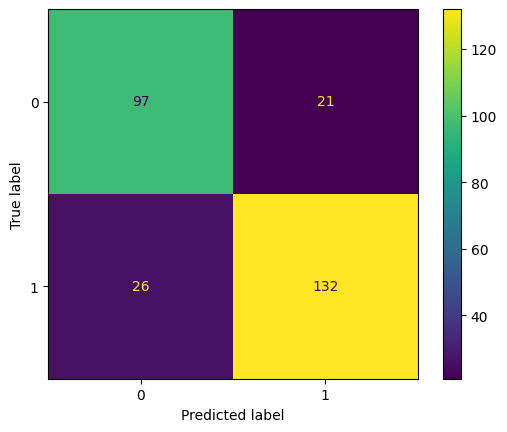

In [145]:
report(best_lr, X_test, y_test)

## Decision Tree
Using the grid search in this classifier will improve the performance compared to the standard model.

In [146]:
# Decision tree with standard hyperparameters 
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
scores = cross_val_score(dt, X_train, y_train, cv=5)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")
print(f"Accuracy on cross validation: {scores.mean()}")


Accuracy on the test set: 0.7789855072463768
Accuracy on cross validation: 0.8021681201550388


In [147]:
# Decision tree with greed search
dt = DecisionTreeClassifier()
parameters = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 4, 8, 16, 32],
    "min_samples_leaf": [2, 4, 8, 16, 32],
    "min_samples_split": [2, 4, 8, 16, 32]
}

dt_cv = GridSearchCV(dt, parameters, cv=5)
dt_cv.fit(X_train, y_train)
# Take the best tree model
best_tree = dt_cv.best_estimator_
print("Best parameters: ", dt_cv.best_params_)


Best parameters:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [148]:
cv_score = dt_cv.best_score_
y_pred = best_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")
print(f"Accuracy on cv dt: {cv_score}")


Accuracy on the test set: 0.7971014492753623
Accuracy on cv dt: 0.8363856589147286


              precision    recall  f1-score   support

           0       0.72      0.86      0.78       118
           1       0.88      0.75      0.81       158

    accuracy                           0.80       276
   macro avg       0.80      0.81      0.80       276
weighted avg       0.81      0.80      0.80       276



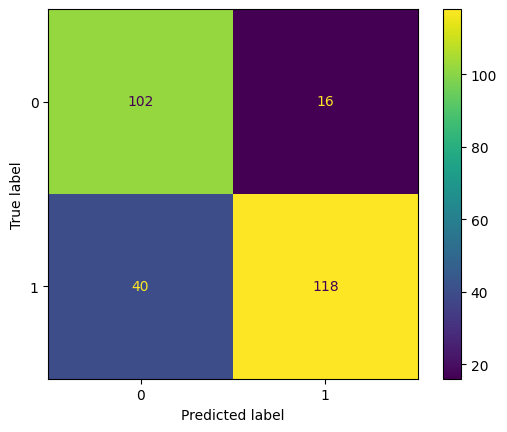

In [149]:
report(best_tree, X_test, y_test)

# Conclusion
We saw a simple classification task using a linear regression and a decision tree.


Both models present an accuracy above the 80% on test set.

The precision and the recall metrics are slightly different.

For example the decision tree has a better recall on the "0" class, it means that the majority of the cases of that class were classified correctly.
On the other hand, the linear regression model has a better precision on that class implying a minor number of false positive.